<a href="https://colab.research.google.com/github/Rogerio-mack/game_analysis/blob/main/Game_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study hypotheses

Three research questions were investigated in this study:

1. whether the interaction device influences the player's experience;
2. whether player performance impacts the gaming experience;
3. whether there is a difference between gender related to preference for the interaction device.

# Scoring guidelines GEQ Post-game Module

The post-game Module consists of four components; the items for each are listed below. Component **scores are computed as the average value of its items**.

- Positive Experience: Items 1, 5, 7, 8, 12, 16.
- Negative Experience: Items 2, 4, 6, 11, 14, 15.
- Tiredness: Items 10, 13.
- Returning to Reality: Items 3, 9, and 17



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, pearsonr, chi2_contingency

# Calculate component scores

In [ ]:
df = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Game Experience Questionnaire")
df.head()

,Carimbo de data/hora,TIA,Acabei de jogar com o dispositivo:,1. Me senti revigorado após a experiência com o jogo,2. Senti desconforto ou mal-estar após a experiência com o jogo,"3. Tive dificuldade em retornar à realidade após a experiência com o jogo. Em outras palavras, o jogo foi envolvente a ponto de eu não perceber que sai do jogo e voltei à realidade.",4. Senti algum grau de culpa após a experiência com o jogo,5. Experimentei uma sensação de vitória após a experiência com o jogo,6. Considerei a experiência com o jogo uma perda de tempo,7. Senti um aumento de energia após a experiência com o jogo,8. Fiquei satisfeito com a experiência proporcionada pelo jogo,9. Me senti desorientado durante ou após a experiência com o jogo,10. Senti exaustão física ou mental após a experiência com o jogo,11. Achei que poderia ter tido um desempenho melhor após finalizar o jogo,"12. Me senti poderoso após finalizar o jogo, ou seja, tive uma sensação de realização, conquista ou competência significativa ao finalizar o jogo",13. Senti fadiga significativa após a experiência com o jogo,14. Fiquei decepcionado com a experiência proporcionada pelo jogo,15. Me senti envergonhado durante ou após a experiência com o jogo,16. Senti orgulho das minhas conquistas (pontuação) durante a experiência com o jogo,"17. Tive a sensação de ter vivido uma experiência intensa e imersiva, tal como retornar de uma jornada"
0,2023-08-21 16:54:47.100,42118816,Skate,5,1,1,1,5,3,1,5,1,1,5,3,1,1,1,4,2
1,2023-08-21 16:59:33.861,42118816,Joystick,1,1,1,1,4,3,1,3,1,1,3,1,1,4,1,3,1
2,2023-08-21 17:05:08.876,42118816,Teclado,2,1,1,1,1,4,1,4,1,1,1,1,1,3,1,3,1
3,2023-08-22 13:57:56.988,42145333,Joystick,2,1,1,1,2,1,2,2,1,1,3,1,1,1,1,2,1
4,2023-08-22 14:03:30.943,42145333,Teclado,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,3,1


In [ ]:
Positive_Experience = np.array([1, 5, 7, 8, 12, 16])
Negative_Experience = np.array([2, 4, 6, 11, 14, 15])
Tiredness = np.array([10, 13])
Returning_to_Reality= np.array([3, 9, 17])

## Some df transformations



In [ ]:
df.columns = ['date_time', 'TIA', 'device'] + list(np.arange(1,18,1))
df.device = df.device.replace(['Skate','Joystick','Teclado'], ['skate','joystick','keyboard'])
df.head()

,date_time,TIA,device,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2023-08-21 16:54:47.100,42118816,skate,5,1,1,1,5,3,1,5,1,1,5,3,1,1,1,4,2
1,2023-08-21 16:59:33.861,42118816,joystick,1,1,1,1,4,3,1,3,1,1,3,1,1,4,1,3,1
2,2023-08-21 17:05:08.876,42118816,keyboard,2,1,1,1,1,4,1,4,1,1,1,1,1,3,1,3,1
3,2023-08-22 13:57:56.988,42145333,joystick,2,1,1,1,2,1,2,2,1,1,3,1,1,1,1,2,1
4,2023-08-22 14:03:30.943,42145333,keyboard,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,3,1


In [ ]:
df['Positive_Experience'] = df[Positive_Experience].mean(axis=1)
df['Negative_Experience'] = df[Negative_Experience].mean(axis=1)
df['Tiredness'] = df[Tiredness].mean(axis=1)
df['Returning_to_Reality'] = df[Returning_to_Reality].mean(axis=1)

df.head()


,date_time,TIA,device,1,2,3,4,5,6,7,...,12,13,14,15,16,17,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,2023-08-21 16:54:47.100,42118816,skate,5,1,1,1,5,3,1,...,3,1,1,1,4,2,3.833333,2.000000,1.0,1.333333
1,2023-08-21 16:59:33.861,42118816,joystick,1,1,1,1,4,3,1,...,1,1,4,1,3,1,2.166667,2.166667,1.0,1.000000
2,2023-08-21 17:05:08.876,42118816,keyboard,2,1,1,1,1,4,1,...,1,1,3,1,3,1,2.000000,1.833333,1.0,1.000000
3,2023-08-22 13:57:56.988,42145333,joystick,2,1,1,1,2,1,2,...,1,1,1,1,2,1,1.833333,1.333333,1.0,1.000000
4,2023-08-22 14:03:30.943,42145333,keyboard,1,1,1,1,2,1,1,...,1,1,1,1,3,1,1.666667,1.000000,1.0,1.000000


# Show Post Game Scores distribution

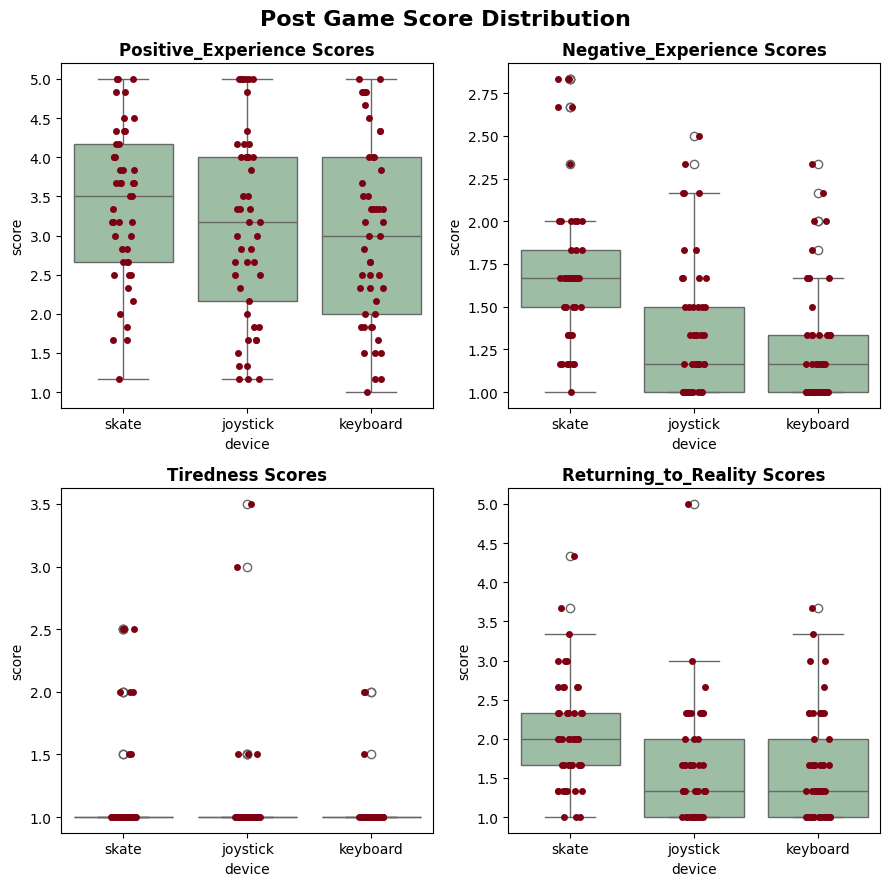

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(9,9))

for ax, post_game in zip(axes.flatten(),df.columns[-4::]):
  sns.boxplot(x='device', y=post_game, data=df, color='#99c2a2',ax=ax) #, meanprops={"markersize":200})
  sns.stripplot(x='device', y=post_game, data=df, color='#7d0013', ax=ax)
  ax.set_title(post_game + ' Scores',weight='bold')
  ax.set_xlabel('device')
  ax.set_ylabel('score')

plt.suptitle('Post Game Score Distribution',fontsize=16,weight='bold')
plt.tight_layout()
plt.show()



# 1. Whether the interaction device influences the player's experience

**`ANOVA one-way method`** applied.

**Results**

* Device type does not influence the Positive_Experience. f-stat = $1.593921$ p-value = $0.206690$
* **Device type influences the Negative_Experience**. f-stat = $15.448490$ p-value = $0.000001$
* Device type does not influence the Tiredness. f-stat = $1.261331$ p-value = $0.286387$
* **Device type influences the Returning_to_Reality**. f-stat = $6.505133$ p-value = $0.001974$

In [ ]:
# ANOVA by device and post_game
for post_game in df.columns[-4::]:
  f_stat, p_value = f_oneway(df[df['device'] == 'skate'][post_game],
                            df[df['device'] == 'joystick'][post_game],
                            df[df['device'] == 'keyboard'][post_game])
  if p_value < 0.05:
      print(f"Device type influences the {post_game}. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")
  else:
      print(f"Device type does not influence the {post_game}. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")

Device type does not influence the Positive_Experience. f-stat = 1.593921 p-value = 0.206690
Device type influences the Negative_Experience. f-stat = 15.448490 p-value = 0.000001
Device type does not influence the Tiredness. f-stat = 1.261331 p-value = 0.286387
Device type influences the Returning_to_Reality. f-stat = 6.505133 p-value = 0.001974


# 2. Whether player performance impacts the gaming experience

**`Pearson method`** should be applied.

**For now, inconclusive**. **Issue:**  It is necessary to associate each occurrence of the Game Experience Questionnaire with the player's score. There are, however, more scores than responses to the questionnaire.

In [ ]:
dfs = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Skate.xlsx')
dfs = dfs.iloc[:,range(0,4)]
dfs['device'] = 'skate'
dfs.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


In [ ]:
dfj = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Joystick.xlsx')
dfj = dfj.iloc[:,range(0,4)]
dfj['device'] = 'joystick'
dfj.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,0,5.73,5.73,joystick
1,21505616,0,3.23,8.96,joystick
2,21505616,0,3.49,12.45,joystick
3,32143621,5,22.94,22.94,joystick
4,32143621,9,18.03,40.97,joystick


In [ ]:
dfk = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Teclado.xlsx')
dfk = dfk.iloc[:,range(0,4)]
dfk['device'] = 'keyboard'
dfk.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,1,8.94,8.94,keyboard
1,21505616,1,3.51,12.45,keyboard
2,21505616,2,7.01,19.46,keyboard
3,32143621,34,124.45,124.45,keyboard
4,32143621,34,3.51,127.96,keyboard


In [ ]:
print('Skate    rounds played: ', len(dfs))
print('Joystick rounds played: ', len(dfj))
print('Keyboard rounds played: ', len(dfk))

Skate    rounds played:  132
Joystick rounds played:  129
Keyboard rounds played:  129


In [ ]:
print('Post game answers: ', len(df))

Post game answers:  147


# 3. Whether there is a difference between gender related to preference for the interaction device

**`Chi-square method`** applied

**Issue** (*warning*): There a more participant profiles (49) than preference answers (34). There is also a preference answer with no profile. Thus, this results in only 33 cases.

**Results**

* There is no evidence that gender influences device preference. Chi-square: $0.462947$ p-value = $0.793364$
* There is no evidence that gender influences opinions about how challenging the gaming experience is. Chi-square: $0.812808$ p-value = $0.666041$

In [ ]:
d1 = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Perfil de Participante")
d1 = d1[['TIA','Gênero']]

display( d1.head() )
print( len(d1) )

,TIA,Gênero
0,42118816,Feminino
1,42145333,Masculino
2,42326321,Masculino
3,32339623,Masculino
4,42305535,Masculino


49


In [ ]:
d2 = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Preferência")
d2.columns = ['date_time', 'TIA', 'joystick_p', 'keyboard_p', 'skate_p', 'joystick_d', 'keyboard_d', 'skate_d', 'comments']
d2 = d2.dropna()
d2.TIA = d2.TIA.astype('int')

display( d2.head() )
print( len(d2) )

,date_time,TIA,joystick_p,keyboard_p,skate_p,joystick_d,keyboard_d,skate_d,comments
1,2023-08-22 14:12:44.482,42145333,3,2,1,3,3,1,"experiência top com o skate, Com joystick e te..."
2,2023-08-22 15:05:52.265,32339623,3,2,1,2,3,1,"A diversão desse jogo está no modo de jogar, a..."
3,2023-08-22 15:26:46.963,42305535,1,2,3,2,1,3,Muito bom o skate!
4,2023-08-22 15:47:32.495,42308720,2,3,1,2,3,1,achei muito do supimpa (muito divertido)
6,2023-09-04 12:00:42.420,32345224,2,3,1,2,3,1,"Jogar com o skate foi o mais divertido, sinto ..."


34


In [ ]:
d2['preference'] = (d2[[x for x in d2.columns if '_p' in x]] == 1).idxmax(axis=1)
d2['challenger'] = (d2[[x for x in d2.columns if '_d' in x]] == 1).idxmax(axis=1)

d2 = d2[['TIA','preference','challenger']]
d2.head()

,TIA,preference,challenger
1,42145333,skate_p,skate_d
2,32339623,skate_p,skate_d
3,42305535,joystick_p,keyboard_d
4,42308720,skate_p,skate_d
6,32345224,skate_p,skate_d


In [ ]:
df = d2.merge(d1, how='inner', left_on='TIA', right_on='TIA')
df = df.rename(columns={'Gênero':'sex'})

display( df.head() )
print( len(df) )

,TIA,preference,challenger,sex
0,42145333,skate_p,skate_d,Masculino
1,32339623,skate_p,skate_d,Masculino
2,42305535,joystick_p,keyboard_d,Masculino
3,42308720,skate_p,skate_d,Masculino
4,32345224,skate_p,skate_d,Masculino


33


In [ ]:
contingency_table = pd.crosstab(df['sex'], df['preference'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print(f"There is evidence that gender influences device preference. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")
else:
    print(f"There is no evidence that gender influences device preference. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")

contingency_table = pd.crosstab(df['sex'], df['challenger'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print(f"There is evidence that gender influences opinions about how challenging the gaming experience is. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")
else:
    print(f"There is no evidence that gender influences opinions about how challenging the gaming experience is. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")


There is no evidence that gender influences device preference. Chi-square: 0.462947 p-value = 0.793364
There is no evidence that gender influences opinions about how challenging the gaming experience is. Chi-square: 0.812808 p-value = 0.666041
